# ✨ EDA proejct 

### [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 유의미한 Feature를 3개 이상 찾고 이를 시각화해보기!!

+ **데이터 그 자체만으로부터 인사이트를 얻어내는 접근법**   

+ **EDA의 Process** ✨
   1. 분석의 **목적**과 **변수**(데이터의 column) 확인
      + 어떤 데이터 타입, 어떤 의미를 가지는가, 이 데이터 타입이 분석에 적절한가 
   2. **데이터 전체적**으로 살펴보기
      + 데이터의 상관관계, 결측치(NA)가 없는지 파악하기, 데이터의 사이즈가 적절한가
   3. 데이터의 **개별 속성 파악**하기
      + 각각의 feature가 무엇인지, 해당 데이터의 개별 속성 파악, 이 속성이 적절하게 매칭되어있는가 
  
  
+ 🤔 [결측치 처리](https://eda-ai-lab.tistory.com/14) & [이상치 처리](https://untitled-memo-2019.tistory.com/2?category=809528)
   
   
+ 함께 보면 좋은 라이브러리 document 👍
   + [numpy](https://numpy.org/devdocs/user/quickstart.html)
   + [pandas](https://pandas.pydata.org/pandas-docs/version/0.15/overview.html#getting-support)
   + [seaborn](https://seaborn.pydata.org/tutorial.html)
   + [matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)

## 1. 데이터 톺아보기

### 1) 사용한 데이터의 기본 정보 & 의미   

+ 사용할 데이터 : 신용카드 사용자 데이터 ([Credit Card customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers))

 
+ 데이터의 목적 : **신용카드 서비스 이용고객 중, 이탈 고객 예측** 
+ 데이터 구성 : 10,000명의 고객에 대한 데이터(고객정보, 신용카드 정보)
+ 데이터 feature : 관심있는 feature에 대해 진하게 표시 ✔
   + CLIENTNUM(고객식별번호)
   + **Attrition_Flag(이탈여부)**
   + **Custormer_Age(고객나이)**
   + **Gender(성별)** - M, F
   + **Dependent_count(부양가족수)**
   + Education_Level(학력)
   + **Marital_Status(결혼여부)** - 기혼, 싱글, 미혼, 모름
   + Income_Category(연산소득범주) - $40K, $40K to 60K, $ 60K to $ 80K, $ 80K to $ 120K
   + **Card_Category(카드타입-blue, silver, gold, platinum)**
   + **Months_on_book(이용 기간)**
   + Total_Relationship_Count(보유한 계좌 수)
   + **Months_Inactive_12_mon(지난 12개월동안 비활성상태인 개월수)**
   + Contacts_Count_12_mon(지난 12 개월 동안의 연락처 수)
   + Credit_Limit(신용 카드 신용 한도)
   + Total_Revolving_Bal(신용 카드의 회전 잔액)
   + Avg_Open_To_Buy(신용 한도 구매 가능 (지난 12 개월 평균))
   + Total_Amt_Chng_Q4_Q1(거래 금액의 변동 (Q1 대비 Q4))
   + Total_Trans_Amt(총 거래 금액 (지난 12 개월))
   + Total_Trans_Ct(총 거래 수 (지난 12 개월))
   + Total_Ct_Chng_Q4_Q1(거래 건수 변경 (Q1 대비 Q4)
   + **Avg_Utilization_Ratio(평균 카드 사용률)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_df=pd.read_csv('./archive/BankChurners.csv') #데이터 불러오기

credit_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


+ 위에서 설명은 안했지만, 마지막 2개의 Naive_Bayes_Classifier_~ 는 무시 ❗
   + 이는 Naive Bayes 분류기로 고객 이탈을 예측 분류한 결과임  
   
   
+ 해당 데이터에서 실제로 이탈고객은 16.07%에 불과함..!

In [3]:
# Naive_bayese drop시키기

credit_df=credit_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

#origin_df=credit_df

credit_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## 2) 데이터 형태

In [4]:
credit_df.dtypes #데이터 타입 확인하기

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### 👇 데이터 형태 정리하면 다음과 같음 👇

### ✔ categorical data 
   + Attrition_Flag               
   + Gender
   + Education_Level
   + Marital_Status
   + Income_Category
   + Card_Category

### ✔ numerical data   

   + **continuous data**   
   
      + Credit_Limit
      + Avg_Open_To_Buy
      + Total_Amt_Chng_Q4_Q1
      + Total_Ct_Chng_Q4_Q1
      + Avg_Utilization_Ratio   
      
   
   + **discrete data**   
   
      + CLIENTNUM
      + Customer_Age
      + Dependent_count
      + Months_on_book
      + Total_Relationship_Count
      + Months_Inactive_12_mon
      + Contacts_Count_12_mon
      + Total_Revolving_Bal
      + Total_Trans_Amt
      + Total_Trans_Ct   
      

## 3) 데이터에 관한 통계정보 확인

In [5]:
#수치형 데이터에 대해 정보(통계) 확인
credit_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## 4) 데이터 상관계수 확인

In [6]:
# 상관계수 확인해보기
credit_df.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


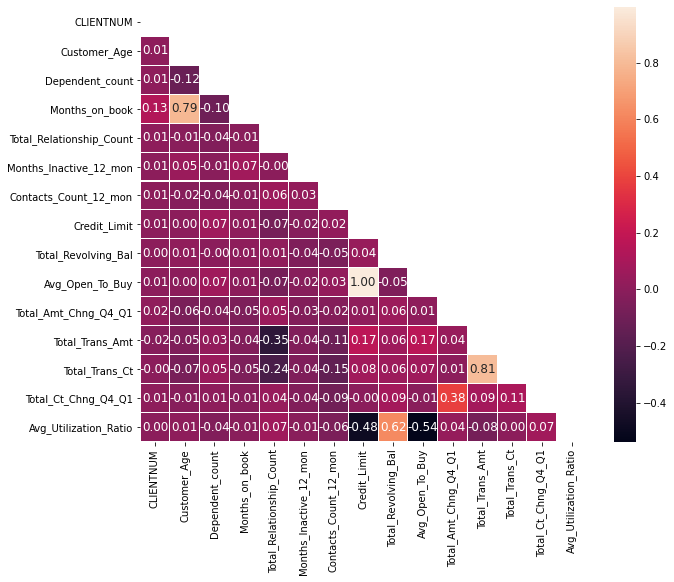

In [7]:
# 히트맵으로 시각화(상관계수)

fig, ax=plt.subplots(figsize=(10,8)) 

mask=np.zeros_like(credit_df.corr(), dtype=np.bool) #upper triangular
mask[np.triu_indices_from(mask)]=True

sns.heatmap(credit_df.corr(), annot=True, mask=mask, fmt='.2f', linewidths=.01, annot_kws={'size':12})

#sns,heatmap(credit_df.corr(), annot=True, tmt='.2f')
plt.show()

### 상관관계 발견 ❗❗
 
+ Customer_Age , Months_on_book : 0.788912 
+ Credit_Limit , Avg_Open_To_Buy : 0.995981
+ Total_Revolving_Bal , Avg_Utilization_Ratio : 0.624022 
+ Total_Trans_Amt , Total_Trans_Ct : 0.807192

## 5) 결측치 존재여부 확인

In [8]:
# 결측치가 있는가

credit_df.isnull().sum() #결측치 x !

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
# unknown 값이 있는가?

(credit_df=='Unknown').sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

### Education_Level, Marital_Status, Income_Category에 대해  Unknown값 존재 !
   + Education_Level, Marital_Status, Income_Category에 대해 이탈고객이 있는가?

In [10]:
A=credit_df[credit_df['Education_Level']=='Unknown']
A[A['Attrition_Flag']=='Attrited Customer']

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
82,711013983,Attrited Customer,55,F,4,Unknown,Married,$40K - $60K,Blue,45,...,4,3,2158.0,0,2158.0,0.585,615,12,0.714,0.000
99,711887583,Attrited Customer,47,M,2,Unknown,Married,$80K - $120K,Blue,37,...,3,3,5449.0,1628,3821.0,0.696,836,18,0.385,0.299
172,708953883,Attrited Customer,53,M,2,Unknown,Married,$80K - $120K,Blue,36,...,2,1,3212.0,0,3212.0,0.713,757,20,0.250,0.000
240,710299608,Attrited Customer,53,F,2,Unknown,Married,Less than $40K,Blue,33,...,3,3,2859.0,2517,342.0,0.993,817,30,0.667,0.880
337,709278258,Attrited Customer,54,M,2,Unknown,Married,$40K - $60K,Blue,44,...,3,2,2902.0,2517,385.0,0.821,996,26,0.444,0.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10023,715154058,Attrited Customer,49,F,0,Unknown,Married,Less than $40K,Blue,39,...,3,3,4982.0,2517,2465.0,0.903,9274,65,0.857,0.505
10071,713281833,Attrited Customer,37,M,3,Unknown,Single,$40K - $60K,Blue,29,...,2,3,13589.0,2517,11072.0,0.941,9456,79,1.026,0.185
10089,720328983,Attrited Customer,52,F,5,Unknown,Married,Less than $40K,Blue,36,...,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [11]:
A=credit_df[credit_df['Income_Category']=='Unknown']
A[A['Attrition_Flag']=='Attrited Customer']

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
283,718621608,Attrited Customer,54,F,2,High School,Married,Unknown,Blue,44,...,3,1,6094.0,0,6094.0,1.129,909,14,0.273,0.000
288,709173108,Attrited Customer,54,F,4,Graduate,Married,Unknown,Blue,40,...,2,2,2532.0,2221,311.0,0.491,799,21,0.235,0.877
509,716223708,Attrited Customer,45,F,3,Uneducated,Single,Unknown,Blue,36,...,3,3,4028.0,710,3318.0,0.731,791,22,0.833,0.176
534,709345008,Attrited Customer,53,F,2,Doctorate,Married,Unknown,Blue,39,...,2,3,1438.3,0,1438.3,0.644,807,22,0.692,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10020,715020933,Attrited Customer,44,F,4,High School,Unknown,Unknown,Blue,34,...,3,4,15944.0,0,15944.0,0.919,9360,67,0.763,0.000
10021,711149133,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,...,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575
10040,714677583,Attrited Customer,50,F,3,Doctorate,Single,Unknown,Blue,36,...,3,3,5173.0,0,5173.0,0.912,8757,68,0.789,0.000
10092,713437008,Attrited Customer,40,F,3,Graduate,Married,Unknown,Blue,25,...,2,3,6888.0,1878,5010.0,1.059,9038,64,0.829,0.273


### 해당 값이 Unknown이여도 의미가 있을수도 있으므로, 어떻게 처리를 해야될지가 관건.

+ 먼저 위의 결과를 통해, 다음을 알 수 있었음.
   + Education_Level : 1519 중 256이 이탈 고객 존재 
   + Marital_Status : 749 중 256이 이탈 고객 존재
   + Income_Category : 1112 중 187이 이탈 고객 존재
   
   
+ 찾아보니 scikit-learn 라이브러리에서 RandeomForest 분류기를 통해 추정값을 대체해주는 방법을 진행한 사람이 있었음.   
   + 우선 여기서는 다른 feature를 다룰거여서 unknown값을 지닌 feature를 다루는 건 따로 해볼 예정 ❗❗❗

## 6) 데이터 타입 변경

### Attrition_Flag에 대해 class로 구별 (데이터 타입 변경)

+ 이탈한 고객 : 1 , 이탈하지 않은 고객 : 0으로 mapping 시켜주기

In [12]:
# 이탈이면 1로 표현!!
map_att={'Existing Customer':0, 'Attrited Customer':1}
col=['Attrition_Flag']

credit_df[col]=credit_df[col].applymap(map_att.get)
credit_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### 7) 데이터 사이즈 적절한가?

+ 16%정도의 Attrition Customer 존재   

+ 전체 데이터에 대해 n개 랜덤 추출해야되나?
   + 이 경우, 전체 데이터의 이탈고객의 비율이 16%인테 여기서 또 랜덤하게 추출하면 이탈고객에 대해 분석하기 어려울 것같음   
   
+ 각 이탈여부(그룹)에 따라 특정 비율로 데이터 랜덤 추출?
   + 이탈고객의 거의 모든 데이터(1620명)를 사용했으며, 이탈하지 않은 고객에 대해서는 4860명(이탈고객의 3배) 랜덤 추출해서 진행해봤음.
   + 이 경우, 랜덤하게 데이터를 추출해서 전체적인 데이터의 유의미한 특징을 추출하기 어려울 것 같음.
   

+ 따라서 전체 데이터에 대해 분석 진행하였음   

In [13]:
#credit_df=credit_df.sample(n=2000) #전체 데이터의 20%를 비복원
#credit_df

In [14]:
# Attrition_Flag의 각 그룹에 대해 균일하게 데이터 추출.

#credit_df_E=credit_df[credit_df['Attrition_Flag']==0].sample(n=4860)
#credit_df_A=credit_df[credit_df['Attrition_Flag']==1].sample(n=1620)

#credit_df=pd.concat([credit_df_A, credit_df_E])
#credit_df

### 데이터 추출을 해봤을 때와 안했을 때 그래프의 차이가 거의 없어서 사이즈 조절을 하지 않고 진행하였음

## 2. 데이터의 가설 세워보기   

💫 **고객 나이**와 관계가 있는가?

💫 **성별**에 따라 차이가 존재하는가?

💫 **평균 카드 사용률**에 따라 차이가 있는가?
   + 평균 카드 사용률이 낮을수록 이탈할 가능성이 높을 것 같다.

💫 **지난 12개월동안의 총 거래수**에 따라 차이가 있는가?
   + 거래수가 적으면 해지할 가능성이 있을 것 같다.

💫 **카드 category**와 관계가 있는가?
   + 각각 혜택이 다르니까 불필요해지면 해지할 것 같다.
   
💫 **사용기간**과 관계가 있는가?
   + 사용기간이 길수록 해지하는 경우가 많을 것 같다.

## 3. 가설 검증을 위한 증거 찾기 🕵️‍♀️

### 1) 이탈 여부 flag (Attrition_Flag)

In [15]:
credit_df['Attrition_Flag'].value_counts() #각 이탈여부에 따른 고객수

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

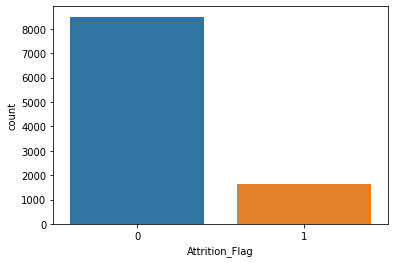

In [16]:
# 이탈고객/ 현재고객 수 countplot으로 시각화

sns.countplot(x='Attrition_Flag', data=credit_df)
plt.show()

In [17]:
credit_df.corr()['Attrition_Flag']
 
# Total_Trans_Ct와 -0.371403 ❗❗

CLIENTNUM                  -0.046430
Attrition_Flag              1.000000
Customer_Age                0.018203
Dependent_count             0.018991
Months_on_book              0.013687
Total_Relationship_Count   -0.150005
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
Credit_Limit               -0.023873
Total_Revolving_Bal        -0.263053
Avg_Open_To_Buy            -0.000285
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Trans_Amt            -0.168598
Total_Trans_Ct             -0.371403
Total_Ct_Chng_Q4_Q1        -0.290054
Avg_Utilization_Ratio      -0.178410
Name: Attrition_Flag, dtype: float64

### 2) 고객 나이 (Customer_Age)

In [18]:
# 먼저 Customer_Age에 대한 정보 확인

credit_df.describe()['Customer_Age']
# 데이터의 분포는 적당히 잘 퍼진거같음 !

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

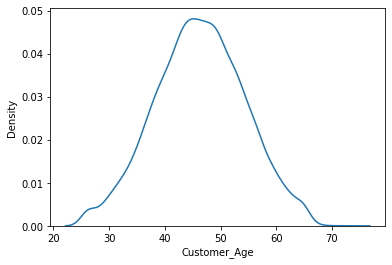

In [19]:
# 데이터 분포 확인
sns.kdeplot(x='Customer_Age', data=credit_df)
plt.show()

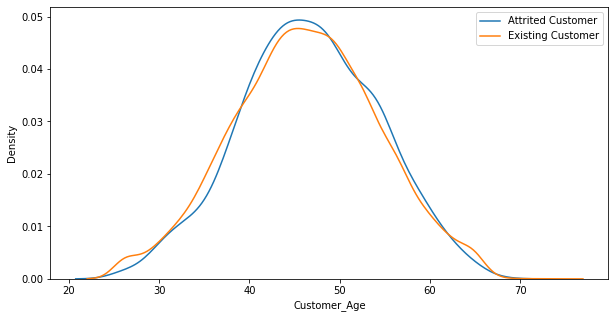

In [20]:
# 나이와 이탈여부의 경향성

fig, ax=plt.subplots(1,1, figsize=(10,5)) #가로 몇개, 세로 몇개 그릴건지
sns.kdeplot(x=credit_df[credit_df.Attrition_Flag==1]['Customer_Age'], ax=ax)
sns.kdeplot(x=credit_df[credit_df.Attrition_Flag==0]['Customer_Age'], ax=ax)

plt.legend(['Attrited Customer', 'Existing Customer'])
plt.show() 

### 40대 전까지는 미세하게 이탈고객이 적었으나, 40~60대쯤에는 이탈고객이 조금 많은것을 확인 할 수 있음.  좀더 구간으로 나눠서 시각화 해보기 ❗❗❗

+ 20-40대, 40-60대, 60-80대로 구간을 나눔(interval=20) 

In [21]:
bins=[20, 40, 60, 80]
labels = ['20~40', '40~60', '60~80']

credit_df['Age_sp']=pd.cut(credit_df['Customer_Age'], bins, labels=labels, ordered=True)

credit_df['Age_sp']

0        40~60
1        40~60
2        40~60
3        20~40
4        20~40
         ...  
10122    40~60
10123    40~60
10124    40~60
10125    20~40
10126    40~60
Name: Age_sp, Length: 10127, dtype: category
Categories (3, object): ['20~40' < '40~60' < '60~80']

In [22]:
# 고객나이와 이탈여부의 관계

credit_df.groupby(['Attrition_Flag', 'Age_sp'])['Attrition_Flag'].count()

Attrition_Flag  Age_sp
0               20~40     2055
                40~60     6098
                60~80      347
1               20~40      342
                40~60     1227
                60~80       58
Name: Attrition_Flag, dtype: int64

c:\users\admin\pycharmprojects\pythonproject2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


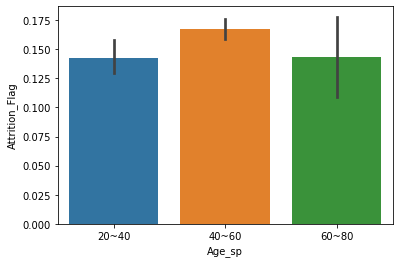

In [23]:
sns.barplot('Age_sp', 'Attrition_Flag', data=credit_df)
plt.show()

### 이탈고객이 상대적으로 40~60대가 많다는 것을 확인할 수 있음 ❗❗

### 🤔 Age_sp + Gender + Attrition_Flag ? 

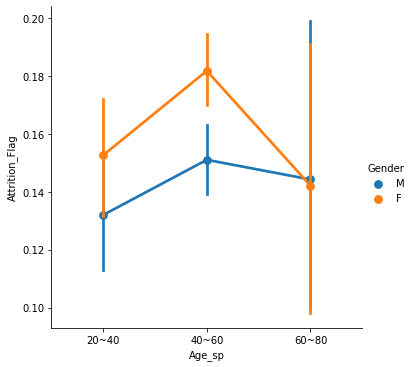

In [24]:
sns.catplot(x='Age_sp', y='Attrition_Flag', hue='Gender', data=credit_df, kind="point")
plt.show()

### 각 나이대에서 성별로 나뉘어 보면, 20~60대까지는 여성고객이 이탈하는 경우가 많음을 확인할 수 있음 ❗❗❗

### 3) 평균 사용률 (Avg_Utilization_Ratio)

+ 평균 사용률이 적은 사람들이 이탈할 가능성이 높을 것 같다!

In [25]:
credit_df.describe()['Avg_Utilization_Ratio']

count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64

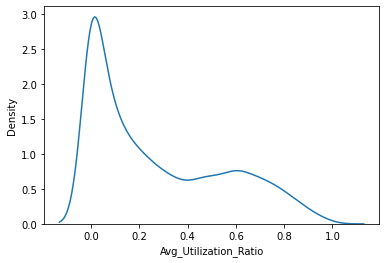

In [26]:
sns.kdeplot(x='Avg_Utilization_Ratio', data=credit_df)
plt.show()

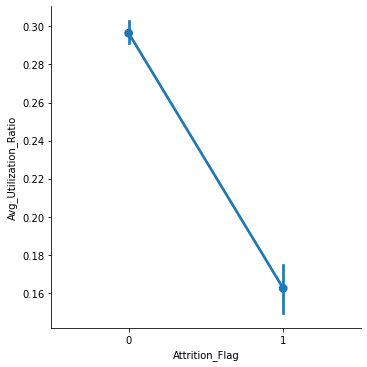

In [27]:
# 이탈여부에 대한 평균 사용률 차이가 있는지 확인해보자!

sns.catplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=credit_df, kind="point")
plt.show()

### 조금 더 세분화해서 확인해보면 좋을 것 같음👇

### 🤔 Avg_Utilization_Ratio + Attrition_Flag + Age_sp ?

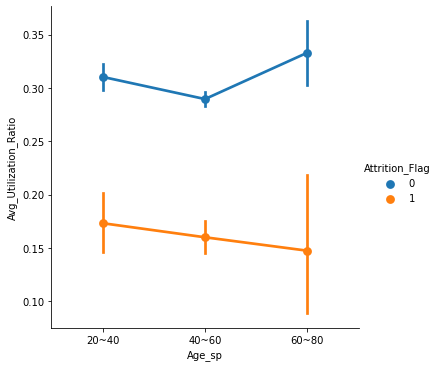

In [28]:
# 이탈여부에 대해 평균 사용률 차이가 있을까?

sns.catplot(x='Age_sp', y='Avg_Utilization_Ratio', hue='Attrition_Flag', data=credit_df, kind="point")
plt.show()

### 이탈 고객들은 평균 사용률이 낮다는 것을 볼 수 있고, 또 나이가 들수록 평균 사용률이 낮아지는 것을 확인할 수 있음 ❗❗❗
   
   
### 반대로 이탈하지 않은 고객들은 평균 사용률이 높으며, 60~80대일때 가장 평균 사용률이 높은 것을 확인할 수 있음 ❗❗❗

### 4) 지난 12개월동안의  총 거래수 (Total_Trans_Ct)

+ 거래수가 적으면 해지할 가능성이 있을 것 같다.

In [29]:
credit_df.describe()['Total_Trans_Ct']

count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64

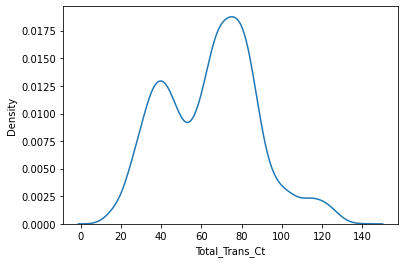

In [30]:
sns.kdeplot(x='Total_Trans_Ct', data=credit_df)
plt.show()
# 낙타 등 같이 생김 -> 쌍봉분포 (bimodal distribution)

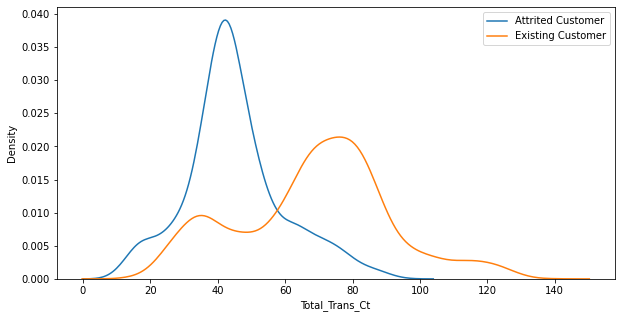

In [31]:
fig, ax=plt.subplots(1,1, figsize=(10,5)) #가로 몇개, 세로 몇개 그릴건지
sns.kdeplot(x=credit_df[credit_df.Attrition_Flag==1]['Total_Trans_Ct'], ax=ax)
sns.kdeplot(x=credit_df[credit_df.Attrition_Flag==0]['Total_Trans_Ct'], ax=ax)

plt.legend(['Attrited Customer', 'Existing Customer'])
plt.show() 

### 총 거래수가 대략 58이하인 경우에 이탈 고객이 많으며, 그 이상인 경우에는 꾸준히 카드를 사용하는 고객들이 많은 것을 확인할 수 있음 ❗❗❗

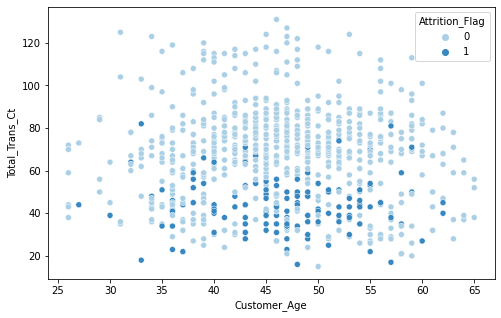

In [32]:
# 랜덤하게 샘플 추출해서 고객 나이에 따른 총 거래수(지난 12개월) 시각화

credit_sample=credit_df.sample(n=800)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Customer_Age', y='Total_Trans_Ct', hue='Attrition_Flag', data=credit_sample, palette='Blues')#'Reds')
plt.show()

### 5) 카드 종류 (Card_Category)

+ 카드 종류에 따라 해지하는 사람들의 수가 많이 차이날 것 같다.
   + 어느 특정 카드의 혜택이 별로거나 불필요하다고 느끼면 해지할 것 같음

In [33]:
# 카드에 따른 인원파악

credit_df[['Card_Category', 'Attrition_Flag']].groupby(['Card_Category']).count()

# blue를 많이 씀!, 그다음 silver, gold, platinum...

,Attrition_Flag
Card_Category,
Blue,9436
Gold,116
Platinum,20
Silver,555


In [34]:
# 카드에 따른 이탈 고객수

credit_df[['Card_Category', 'Attrition_Flag']].groupby(['Card_Category']).sum()

,Attrition_Flag
Card_Category,
Blue,1519
Gold,21
Platinum,5
Silver,82


In [35]:
# 각 카드에 따라 이탈 고객 비율?

credit_df[['Card_Category', 'Attrition_Flag']].groupby(['Card_Category']).mean()

,Attrition_Flag
Card_Category,
Blue,0.160979
Gold,0.181034
Platinum,0.250000
Silver,0.147748


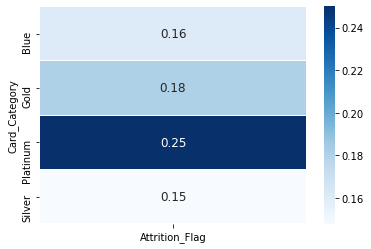

In [36]:
# 각 카드 이용고객에 대한 이탈고객 비율? -> 히트맵
sns.heatmap(credit_df[['Card_Category', 'Attrition_Flag']].groupby(['Card_Category']).mean(), cmap='Blues',  annot=True, fmt='.2f', linewidths=.01, annot_kws={'size':12})
plt.show()

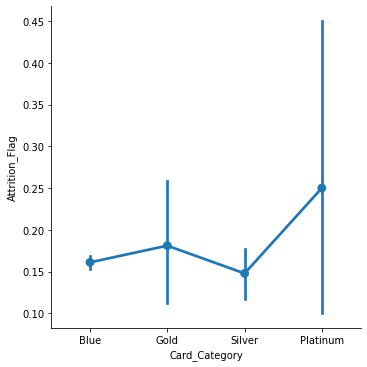

In [37]:
sns.catplot(x='Card_Category', y='Attrition_Flag', kind='point', data=credit_df)
plt.show()

### 카드 사용은 Blue> Silver> Gold > Platinum 순이고, 각 카드의 이탈고객비율은 Platinum>Gold>Blue>Silver 순인 것을 확인 ❗❗❗ Platinum인 경우, 상대적으로 이탈비율이 높은 것을 확인 할 수 있음 ❗❗❗

### 🤔 Card_Category + Attrition_Flag + Credit_Limit ?

+ 카드별 이탈여부에 따라 카드 한도가 많이 차이 날까?


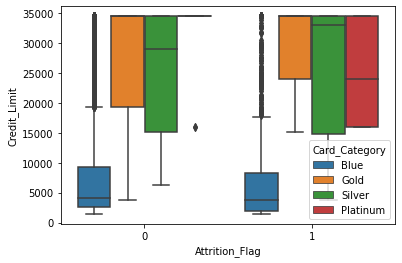

In [38]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', hue='Card_Category', data=credit_df)
plt.show()

### 각 카드의 이탈여부에 따라 카드한도는 다음과 같이 정리할 수 있음.
+ **Blue**의 경우 이탈 여부에 관계없이 카드 한도가 거의 비슷함.
+ **Gold**의 경우 상대적으로 이탈고객의 카드한도가 높음
+ **Silver**의 경우 이탈고객의 평균 카드한도가 높음. 
+ **Platinum**의 경우 이탈여부에 대해 카드한도 차이가 큼.   ❗❗❗

### 🤔 Card_Category + Attrition_Flag + Gender ?

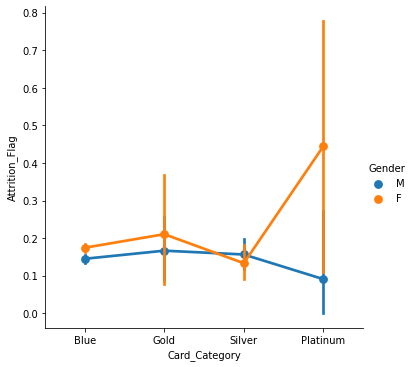

In [39]:
sns.catplot(x='Card_Category', y='Attrition_Flag', hue='Gender', kind='point', data=credit_df)
plt.show()

### Card Category=sliver인 경우를 제외하고, 나머지 카드에 대해서는 상대적으로 여성이 이탈하는 경우가 많은것을 확인할 수 있음 ❗❗❗

+ Card Category=Sliver인 경우가 여성에게 필요한 혜택을 주는 카드인가? 반대로 Platinum인 경우에는 여성에게 딱히 좋은 혜택이 없는 카드인가?

### 6) 사용기간 (Months_on_book)

+ 사용기간이 길수록 해지하는 경우가 많을 것 같다.

In [40]:
credit_df.describe()['Months_on_book']

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

### 구간 나눠서 생각해보기 ❗❗❗

In [41]:
bins=[12, 24, 36, 48, 60]
labels=['1~2 years', '2~3 years', '3~4 years', '4~5 years']
credit_df['Months_on_book_sp']=pd.cut(credit_df['Months_on_book'], bins, labels=labels)#['q1','q2','q3','q4'])

credit_df['Months_on_book_sp']

0        3~4 years
1        3~4 years
2        2~3 years
3        2~3 years
4        1~2 years
           ...    
10122    3~4 years
10123    2~3 years
10124    2~3 years
10125    2~3 years
10126    2~3 years
Name: Months_on_book_sp, Length: 10127, dtype: category
Categories (4, object): ['1~2 years' < '2~3 years' < '3~4 years' < '4~5 years']

c:\users\admin\pycharmprojects\pythonproject2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


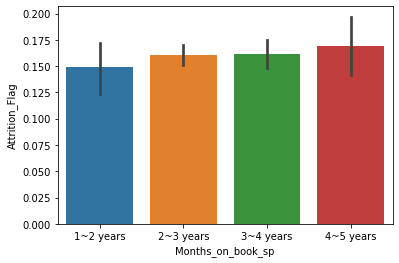

In [42]:
sns.barplot('Months_on_book_sp', 'Attrition_Flag', data=credit_df)
plt.show()

### 1년씩 기간을 나눠서 그래프로 시각화 하였음. 오래 카드를 쓸수록 이탈 고객이 조금 많은 것을 확인 할 수 있음 ❗❗❗

# 결론⭐

### 💫 **고객 나이**와 관계가 있는가?
   + 연속적인 데이터인 나이에 대해 20대씩 구간을 정해 분석했음
   + 나이 구간으로 분석했을 때, **40-60대인 경우에 대해 이탈 고객이 많은 것을 확인**하였음
   + 추가적으로 성별에 대해서 분석한 결과, **20-60대인 경우 여성 이탈고객**이 많았으며, **60-80대인 경우 남성 이탈고객**이 상대적으로 **많았음**

### 💫 **평균 카드 사용률**에 따라 차이가 있는가?
   + 평균 카드 사용률이 낮을수록 이탈 고객이 많은 것을 확인하였음
   + 추가적으로 나이에 대해 분석한 결과, **이탈고객의 경우 평균 카드 사용률이 낮았고**, **나이가 들수록 평균 카드 사용률이 낮아지는 것**을 확인하였음.
   + 반대로 **이탈하지 않은 고객**들은 **평균 카드 사용률이 높았고**, **60-80대일때 가장 평균 사용률이 높았음**
   
   
### 💫 **지난 12개월동안의 총 거래수**에 따라 차이가 있는가?
   + 총 거래수가 **대략 58이하인 경우에 이탈 고객이 많았으며**, 그 이상인 경우에는 꾸준히 신용카드 서비스를 사용하는 고객들이 많은 것을 확인하였음.

### 💫 **카드 category**와 관계가 있는가?
   + 카드는 **Blue > Silver > Gold > Platinum 순으로 많이 사용**되고있으며, **각 카드의 이탈고객비율은 Platinum > Gold > Blue > Silver 순으로 많았음**.   
   
   + 추가적으로 **카드 한도**에 대해 분석한 결과는 다음과 같음.   
   
      + Blue의 경우 이탈 여부에 관계없이 카드 한도가 거의 비슷하였음.
      + Gold의 경우 상대적으로 이탈고객의 카드한도가 높았음.
      + Silver의 경우 이탈고객의 평균 카드한도가 높았음.
      + Platinum의 경우 이탈여부에 대해 카드한도 차이가 컸음.   
      
      
   + 추가적으로 성별에 대해 분석한 결과, Silver인 경우를 제외하고, 나머지 카드에 대해 상대적으로 여성 이탈고객이 많았음.
   
### 💫 **사용기간**과 관계가 있는가?
   + 1년씩 기간을 나눠서 분석을 진행한 결과, **사용기간이 길수록** **이탈 고객이 조금씩 많은 것을 확인**하였음.